In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from credentials import DB_USER, USER_PASSWORD
from sqlalchemy import create_engine, types

In [2]:
db_config = {
    'host': 'localhost',
    'user': DB_USER,
    'password': USER_PASSWORD,
    'database': 'phonepe'
}

### 1. Data Collection 


* Connecting with MySQL Database

In [3]:
# Create the connection string using f-string
connection_string = f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}"

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

* Getting Aggregated Data From Database

In [4]:
query_for_agg_insu = """SELECT * FROM aggregated_insurance"""

query_for_agg_trans = """SELECT * FROM aggregated_transaction"""

query_for_agg_user = """SELECT * FROM aggregated_user"""

# creating dataframes
df_agg_insu = pd.read_sql(query_for_agg_insu,engine)
df_agg_trans = pd.read_sql(query_for_agg_trans,engine)
df_agg_user = pd.read_sql(query_for_agg_user,engine)

* Seperate the Top States, Top District and Top Pincodes

1. Insurance data

In [5]:
query_for_top_states = """SELECT * FROM top_insurance 
                          WHERE `TopState` IS NOT NULL 
                          ORDER BY `Year` ASC, `Quarter` ASC""" 

query_for_top_dist = """SELECT * FROM top_insurance
                        WHERE `TopDistrict` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

query_for_top_pins = """SELECT * FROM top_insurance
                        WHERE `TopPinCode` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

df_top_state_insu = pd.read_sql(query_for_top_states,engine)
df_top_dist_insu = pd.read_sql(query_for_top_dist,engine)
df_top_pins_insu = pd.read_sql(query_for_top_pins,engine)

2. Transcation Data

In [6]:
query_for_top_states = """SELECT * FROM top_transaction 
                          WHERE `TopState` IS NOT NULL 
                          ORDER BY `Year` ASC, `Quarter` ASC""" 

query_for_top_dist = """SELECT * FROM top_transaction
                        WHERE `TopDistrict` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

query_for_top_pins = """SELECT * FROM top_transaction
                        WHERE `TopPinCode` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

df_top_state_trans = pd.read_sql(query_for_top_states,engine)
df_top_dist_trans = pd.read_sql(query_for_top_dist,engine)
df_top_pins_trans = pd.read_sql(query_for_top_pins,engine)

3. User Data

In [7]:
query_for_top_states = """SELECT * FROM top_user 
                          WHERE `TopState` IS NOT NULL 
                          ORDER BY `Year` ASC, `Quarter` ASC""" 

query_for_top_dist = """SELECT * FROM top_user
                        WHERE `TopDistrict` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

query_for_top_pins = """SELECT * FROM top_user
                        WHERE `TopPinCode` IS NOT NULL
                        ORDER BY `Year` ASC, `Quarter` ASC"""

df_top_state_user = pd.read_sql(query_for_top_states,engine)
df_top_dist_user = pd.read_sql(query_for_top_dist,engine)
df_top_pins_user = pd.read_sql(query_for_top_pins,engine)

* Getting Map Data

In [8]:
query_for_map_insu = """SELECT * FROM map_insurance_hover"""
query_for_map_trans = """SELECT * FROM map_transaction"""
query_for_map_user = """SELECT * FROM map_user"""

df_map_insu = pd.read_sql(query_for_map_insu)
df_map_trans = pd.read_sql(query_for_map_trans)
df_map_user = pd.read_sql(query_for_map_user)


TypeError: read_sql() missing 1 required positional argument: 'con'

### 2. Data Cleaning

#### * Aggregated Data

In [ ]:
# Storing all the tables in one dict for better access
dataframes = {"Aggregated Insurance":df_agg_insu,"Aggregated Transaction":df_agg_trans,"Aggregated User":df_agg_user}

In [ ]:
# displaying the first view of tables
for key,value in dataframes.items():
  print(f"{key} table :")
  print(f"{value.head(2)}\n")

Aggregated Insurance table :
   InsuranceCount  InsuranceAmount  Year  Quarter State
0          185348       33732200.0  2020        2  None
1          354284       89495100.0  2020        3  None

Aggregated Transaction table :
            TransactionType  TransactionCount  TransactionAmount  Year  \
0  Recharge & bill payments          72550406       1.447270e+10  2018   
1     Peer-to-peer payments          46982705       1.472460e+11  2018   

   Quarter State  
0        1  None  
1        1  None  

Aggregated User table :
     Brand     Count  RegisteredUsers  Percentage  Year  Quarter State
0   Xiaomi  11926334         46877867    0.254413  2018        1  None
1  Samsung   9609401         46877867    0.204988  2018        1  None



In [ ]:
# displaying rows and columns of tables
for key,value in dataframes.items():
  print(f"{key} shape is - {value.shape}")

Aggregated Insurance shape is - (701, 5)
Aggregated Transaction shape is - (5174, 6)
Aggregated User shape is - (6919, 7)


In [ ]:
# displaying basic info of tables
for key,value in dataframes.items():
  print(f"{key}\n{value.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InsuranceCount   701 non-null    int64  
 1   InsuranceAmount  701 non-null    float64
 2   Year             701 non-null    int64  
 3   Quarter          701 non-null    int64  
 4   State            682 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 27.5+ KB
Aggregated Insurance
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionType    5174 non-null   object 
 1   TransactionCount   5174 non-null   int64  
 2   TransactionAmount  5174 non-null   float64
 3   Year               5174 non-null   int64  
 4   Quarter            5174 non-null   int64  
 5   State              5034 non-null   ob

In [ ]:
# checking for duplicate values 
for key,value in dataframes.items():
  print(f"No. of duplicates in {key} - {value.duplicated().sum()}")

No. of duplicates in Aggregated Insurance - 0
No. of duplicates in Aggregated Transaction - 0
No. of duplicates in Aggregated User - 0


In [ ]:
# checking for missing values
for key,value in dataframes.items():
  print(f"{key}\n{value.isna().sum()}\n")

Aggregated Insurance
InsuranceCount      0
InsuranceAmount     0
Year                0
Quarter             0
State              19
dtype: int64

Aggregated Transaction
TransactionType        0
TransactionCount       0
TransactionAmount      0
Year                   0
Quarter                0
State                140
dtype: int64

Aggregated User
Brand                0
Count                0
RegisteredUsers      0
Percentage           0
Year                 0
Quarter              0
State              187
dtype: int64



##### * Visualizing missing values using Heatmap

In [ ]:
# function for plotting heatmap
def plot_heatmap(df,title):
  plt.figure(figsize=(4, 2))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
  plt.title(f"{title}")
  plt.show()

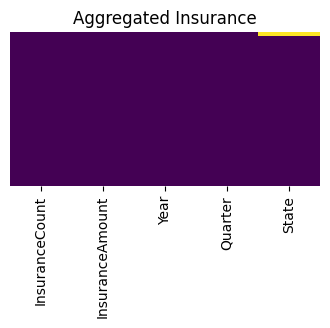

In [ ]:
# heatmap for aggregated insurance
plot_heatmap(df_agg_insu,"Aggregated Insurance")

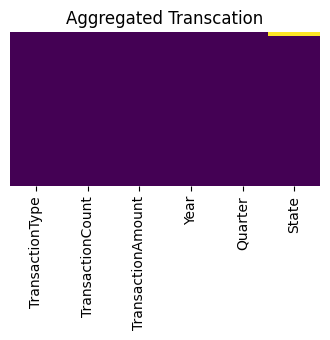

In [ ]:
# heatmap for aggregated transcation
plot_heatmap(df_agg_trans,"Aggregated Transcation")

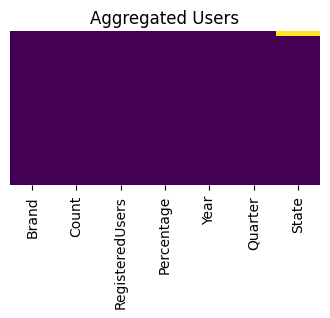

In [ ]:
# heatmap for aggregated users
plot_heatmap(df_agg_user,"Aggregated Users")

In [ ]:
# Displaying Unique Value w.r.t column
for key,value in dataframes.items():
  print(f"Unique values in table {key}")
  for col in value.columns:
    print(f"{col} - {value[col].nunique()}")
  print("\n")

Unique values in table Aggregated Insurance
InsuranceCount - 673
InsuranceAmount - 701
Year - 5
Quarter - 4
State - 36


Unique values in table Aggregated Transaction
TransactionType - 5
TransactionCount - 5106
TransactionAmount - 5168
Year - 7
Quarter - 4
State - 36


Unique values in table Aggregated User
Brand - 20
Count - 6688
RegisteredUsers - 629
Percentage - 6879
Year - 5
Quarter - 4
State - 36




#### * Top Data

In [ ]:
# storing all tables inside a dictionary for better access
dataframes1 = {"Top_State":df_top_state_insu,"Top_District":df_top_dist_insu,"Top_Pincode":df_top_pins_insu}
dataframes2 = {"Top_State":df_top_state_trans,"Top_District":df_top_dist_trans,"Top_Pincode":df_top_pins_trans}
dataframes3 = {"Top_State":df_top_state_user,"Top_District":df_top_dist_user,"Top_Pincode":df_top_pins_user}

In [ ]:
# storing all the above dict in list each dict represents sub category i.e insurance, user etc.
list = [dataframes1,dataframes2,dataframes3]

# Displaying the fisrt view of tabels
for df in list:
  for key,value in df.items():
    print(f"{key} table :")
    print(f"{value.head(2)}\n")


Top_State table :
      TopState  StateCount  StateAmount  Year  Quarter State TopDistrict  \
0  maharashtra     39836.0    6879720.0  2020        2  None        None   
1    karnataka     27358.0    4794150.0  2020        2  None        None   

  DistCount DistAmount TopPinCode PinCount PinAmount  
0      None       None       None     None      None  
1      None       None       None     None      None  

Top_District table :
  TopState StateCount StateAmount  Year  Quarter      State       TopDistrict  \
0     None       None        None  2020        2  meghalaya  east khasi hills   
1     None       None        None  2020        2  meghalaya            ribhoi   

   DistCount  DistAmount TopPinCode PinCount PinAmount  
0       18.0      3753.0       None     None      None  
1        8.0      1822.0       None     None      None  

Top_Pincode table :
  TopState StateCount StateAmount  Year  Quarter           State TopDistrict  \
0     None       None        None  2020        2  

In [ ]:
# displaying the rows and columns of tables
for df in list:
  for key,value in df.items():
    print(f"{key} shape is - {value.shape}")

Top_State shape is - (190, 12)
Top_District shape is - (5798, 12)
Top_Pincode shape is - (6855, 12)
Top_State shape is - (280, 12)
Top_District shape is - (8576, 12)
Top_Pincode shape is - (10277, 12)
Top_State shape is - (280, 7)
Top_District shape is - (8576, 7)
Top_Pincode shape is - (10280, 7)


In [ ]:
# displaying the basic info for tables
for df in list:
  for key,value in df.items():
    print(f"{key}\n{value.info()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopState     190 non-null    object 
 1   StateCount   190 non-null    float64
 2   StateAmount  190 non-null    float64
 3   Year         190 non-null    int64  
 4   Quarter      190 non-null    int64  
 5   State        0 non-null      object 
 6   TopDistrict  0 non-null      object 
 7   DistCount    0 non-null      object 
 8   DistAmount   0 non-null      object 
 9   TopPinCode   0 non-null      object 
 10  PinCount     0 non-null      object 
 11  PinAmount    0 non-null      object 
dtypes: float64(2), int64(2), object(8)
memory usage: 17.9+ KB
Top_State
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopState     0 non-null      obj

In [ ]:
# checking for duplicates
for df in list:
  for key,value in df.items():
    print(f"No. of duplicates in {key} - {value.duplicated().sum()}")

No. of duplicates in Top_State - 0
No. of duplicates in Top_District - 0
No. of duplicates in Top_Pincode - 0
No. of duplicates in Top_State - 0
No. of duplicates in Top_District - 0
No. of duplicates in Top_Pincode - 0
No. of duplicates in Top_State - 0
No. of duplicates in Top_District - 0
No. of duplicates in Top_Pincode - 0


In [ ]:
# checking missing values in each column
for df in list:
  for key,value in df.items():
    print(f"{key}\n{value.isna().sum()}\n")

Top_State
TopState         0
StateCount       0
StateAmount      0
Year             0
Quarter          0
State          190
TopDistrict    190
DistCount      190
DistAmount     190
TopPinCode     190
PinCount       190
PinAmount      190
dtype: int64

Top_District
TopState       5798
StateCount     5798
StateAmount    5798
Year              0
Quarter           0
State           190
TopDistrict       0
DistCount         0
DistAmount        0
TopPinCode     5798
PinCount       5798
PinAmount      5798
dtype: int64

Top_Pincode
TopState       6855
StateCount     6855
StateAmount    6855
Year              0
Quarter           0
State           190
TopDistrict    6855
DistCount      6855
DistAmount     6855
TopPinCode        0
PinCount          0
PinAmount         0
dtype: int64

Top_State
TopState         0
StateCount       0
StateAmount      0
Year             0
Quarter          0
State          280
TopDistrict    280
DistCount      280
DistAmount     280
TopPinCode     280
PinCount       

##### * Visualization of Missing values using Heatmap

##### 1. Top Insurance

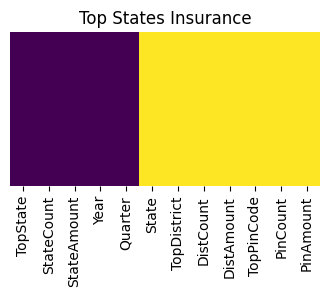

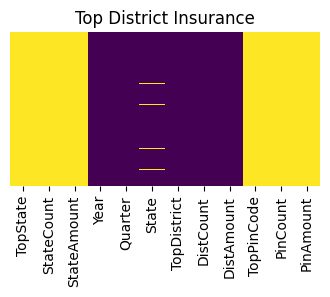

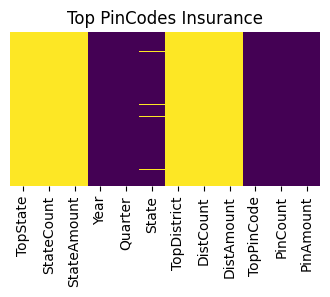

In [ ]:
# heatmap for top states
plot_heatmap(df_top_state_insu,"Top States Insurance")  
plot_heatmap(df_top_dist_insu,"Top District Insurance")
plot_heatmap(df_top_pins_insu,"Top PinCodes Insurance")

##### 2. Top Transaction

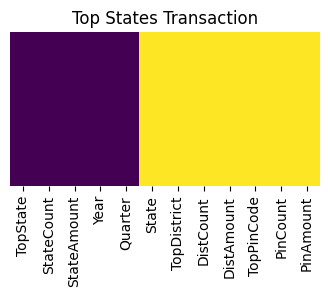

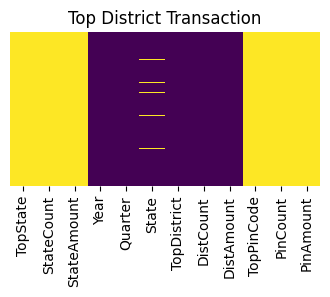

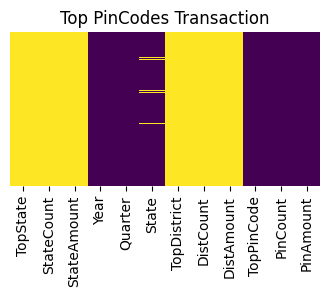

In [ ]:
plot_heatmap(df_top_state_trans,"Top States Transaction")
plot_heatmap(df_top_dist_trans,"Top District Transaction")
plot_heatmap(df_top_pins_trans,"Top PinCodes Transaction")

##### 3. Top Users

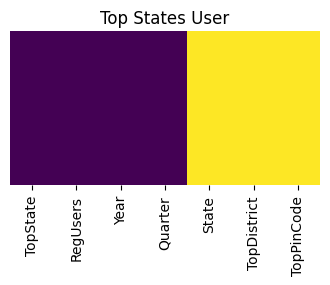

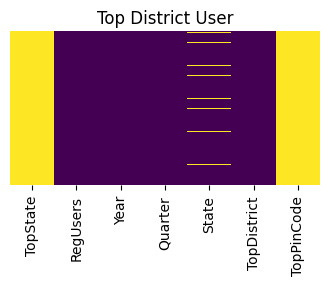

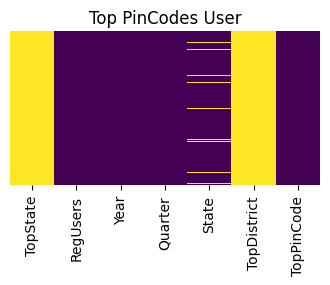

In [ ]:
plot_heatmap(df_top_state_user,"Top States User")
plot_heatmap(df_top_dist_user,"Top District User")
plot_heatmap(df_top_pins_user,"Top PinCodes User")

#### * Map Data

### 3. Data Exploration

### 4. Data Visualization